# Multi-layer perceptron neural network

In [1]:
# Load libraries required 
import tensorflow as tf 
from tensorflow import keras
import matplotlib.pyplot as plt 
from keras.datasets import fashion_mnist 
import numpy as np
import pandas as pd
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.utils import to_categorical
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
tf.__version__, keras.__version__ 

2022-08-11 09:20:40.253034: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2022-08-11 09:20:40.292464: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-08-11 09:20:40.292487: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


('2.9.1', '2.9.0')

### How does a computer view an image?
- Computers vew images as a matrix of numbers (pixels) in the range of [0,255]

- Each input image is a 3D tensor of shape **[height, wifth, channels]**. 

- Keras can convert images into array. For now, we assume that the array of an image is given. In week 8, we will learn how to convert an image into an array

### Download Mnist data

In [2]:

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
xtr = x_train.shape, x_train.dtype
ytr = y_train.shape, y_train.dtype

print("x_train_shape & data type:", xtr)
print("y_train_shape & data type:", ytr)

x_train_shape & data type: ((60000, 28, 28), dtype('uint8'))
y_train_shape & data type: ((60000,), dtype('uint8'))


### Plot data

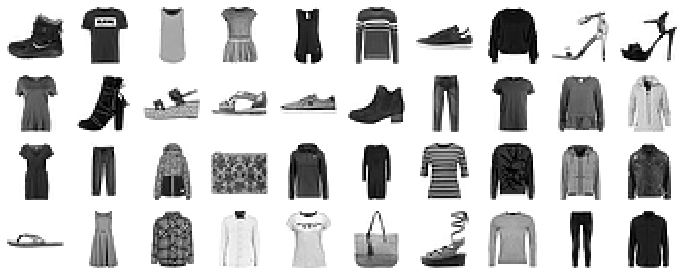

In [3]:
# Plotting data
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols*1.2, n_rows*1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols*row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(x_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')


### Preprocessing Data

1. Shape:  Tensorflow needs image channels last, e.g. (width, height, channels)

2. Normalize pixel values i.e. tranform [0-255] pixels values to [0-1] value

3. One Hot Encoding: Convert class vectors to binary class matrices
num_classes = 10



In [3]:
# 2. Normalize pixel values i.e. tranform [0-255] pixels values to [0-1] value
x_train = x_train.astype('float32')/255 #convert to data type float32
x_test = x_test.astype('float32')/255 #convert to data type float32
# define image dimensions
img_rows, img_cols = 28, 28 #images are 28*28 pixel
input_shape =[img_rows,img_cols]
# 3. One Hot Encoding: Convert class vectors to binary class matrices
num_classes = 10
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

## Build and compile a MLP model


In [4]:
tf.random.set_seed(42)
model = keras.models.Sequential([ # creates a sequential model
        keras.layers.Flatten(input_shape=input_shape), # build the first layer preprocesses the input images into 1D array
        keras.layers.Dense(64, activation="relu"), # dense hidden layer with 64 neurons and Relu AF
        keras.layers.Dense(32, activation= "relu"), # dense hidden layer with 32 neurons and Relu AF
        keras.layers.Dense(10, activation= "softmax") ])

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 64)                50240     
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 10)                330       
                                                                 
Total params: 52,650
Trainable params: 52,650
Non-trainable params: 0
_________________________________________________________________


2022-08-11 09:20:57.669918: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-08-11 09:20:57.669946: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-08-11 09:20:57.669970: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (valid-cl): /proc/driver/nvidia/version does not exist
2022-08-11 09:20:57.670354: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [5]:
# Check the initial weights and biases
hidden1 = model.layers[1]
print(hidden1.name)
model.get_layer(hidden1.name) is hidden1
weights, biases = hidden1.get_weights()
print(weights.shape)
print(weights)
print(biases)


dense
(784, 64)
[[ 0.02768455 -0.00992452 -0.02474982 ... -0.03110002  0.01795187
   0.04203434]
 [ 0.0002701  -0.05335944 -0.0619432  ... -0.04225708  0.01534914
  -0.00040539]
 [ 0.06692175 -0.06363535 -0.06134202 ... -0.01348215  0.0514598
  -0.03235688]
 ...
 [-0.07957833  0.03557436  0.01995013 ... -0.00550453  0.02949119
  -0.07742794]
 [ 0.07534812 -0.02828838  0.04497538 ... -0.02801303 -0.06744733
  -0.07783535]
 [ 0.01969177  0.03882585 -0.04959105 ... -0.0804151  -0.01880921
   0.07838637]]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


### Compile and train model


In [6]:
# Compile model
model.compile(loss=categorical_crossentropy, optimizer=SGD(),
              metrics=['accuracy',keras.metrics.Precision(),keras.metrics.Recall()])

# Train the model

history = model.fit(x_train, y_train, validation_split=0.1,epochs=5)

model.summary()

Epoch 1/5
1688/1688 [==============================] - 3s 1ms/step - loss: 0.8078 - accuracy: 0.7281 - precision: 0.8616 - recall: 0.5535 - val_loss: 0.5588 - val_accuracy: 0.8047 - val_precision: 0.8618 - val_recall: 0.7337
Epoch 2/5
1688/1688 [==============================] - 2s 1ms/step - loss: 0.5126 - accuracy: 0.8222 - precision: 0.8692 - recall: 0.7657 - val_loss: 0.5148 - val_accuracy: 0.8185 - val_precision: 0.8561 - val_recall: 0.7717
Epoch 3/5
1688/1688 [==============================] - 2s 1ms/step - loss: 0.4619 - accuracy: 0.8383 - precision: 0.8778 - recall: 0.7966 - val_loss: 0.4547 - val_accuracy: 0.8397 - val_precision: 0.8786 - val_recall: 0.7975
Epoch 4/5
1688/1688 [==============================] - 2s 1ms/step - loss: 0.4349 - accuracy: 0.8470 - precision: 0.8821 - recall: 0.8092 - val_loss: 0.4907 - val_accuracy: 0.8143 - val_precision: 0.8511 - val_recall: 0.7763
Epoch 5/5
1688/1688 [==============================] - 2s 1ms/step - loss: 0.4137 - accuracy: 0.8535

In [8]:
history.__dict__ 

{'validation_data': None,
 'model': <keras.engine.sequential.Sequential at 0x7f755d4eb910>,
 '_chief_worker_only': None,
 '_supports_tf_logs': False,
 'history': {'loss': [0.8077844381332397,
   0.5126058459281921,
   0.4618542492389679,
   0.43486326932907104,
   0.413728266954422],
  'accuracy': [0.7281481623649597,
   0.8221851587295532,
   0.8382777571678162,
   0.8470185399055481,
   0.853518545627594],
  'precision': [0.8615530729293823,
   0.8692343235015869,
   0.8778467178344727,
   0.8821213841438293,
   0.8869380354881287],
  'recall': [0.5534999966621399,
   0.765666663646698,
   0.7966296076774597,
   0.809166669845581,
   0.8194814920425415],
  'val_loss': [0.5587940812110901,
   0.5147842764854431,
   0.4546739459037781,
   0.49070805311203003,
   0.41458040475845337],
  'val_accuracy': [0.8046666383743286,
   0.8184999823570251,
   0.8396666646003723,
   0.8143333196640015,
   0.8503333330154419],
  'val_precision': [0.8617854118347168,
   0.856139063835144,
   0.878626

### Visualisation

Test loss    : 0.4420103132724762
Test accuracy: 0.847599983215332
Test precision: 0.8786308169364929
Test recall: 0.8137000203132629


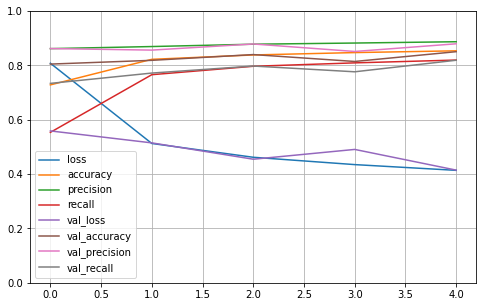

In [10]:

pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)

score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss    :', score[0])
print('Test accuracy:', score[1])
print('Test precision:', score[2])
print('Test recall:', score[3])

### Prediction

In [35]:

x_pred = x_test[:5]
y_proba = model.predict(x_pred)
print(y_proba)
print(y_proba.round(2))

y_pred = np.argmax(model.predict(x_pred), axis=-1)
print(y_pred)

class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
np.array(class_names)[y_pred]



1/1 [==============================] - 0s 15ms/step
[[5.99928608e-05 1.34823424e-07 7.69345643e-05 9.91331854e-06
  1.49837470e-05 1.48147061e-01 2.00242619e-04 2.03966781e-01
  2.47493596e-03 6.45048976e-01]
 [9.44398416e-05 2.14760874e-07 9.82315063e-01 3.79817334e-06
  5.74287027e-03 1.98841263e-10 1.18391989e-02 4.04717287e-10
  4.52417180e-06 1.32071500e-08]
 [1.45752711e-04 9.99734938e-01 1.03949187e-05 3.80197671e-05
  5.20992544e-05 3.75729492e-09 8.41393103e-07 1.06146758e-11
  1.80507704e-05 3.09847525e-09]
 [7.45338693e-05 9.99189913e-01 4.90463644e-05 5.28744771e-04
  1.04527920e-04 7.09308438e-07 6.74907051e-06 7.83079768e-10
  4.51800079e-05 5.01853322e-07]
 [1.17578425e-01 2.62098591e-04 2.53955960e-01 1.49034029e-02
  4.19403650e-02 7.15712986e-06 5.69607377e-01 7.56314239e-06
  1.73179677e-03 5.81494396e-06]]
[[0.   0.   0.   0.   0.   0.15 0.   0.2  0.   0.65]
 [0.   0.   0.98 0.   0.01 0.   0.01 0.   0.   0.  ]
 [0.   1.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0

array(['Ankle boot', 'Pullover', 'Trouser', 'Trouser', 'Shirt'],
      dtype='<U11')

### Save model

In [ ]:

model.save("my_mnist_model.h5")
model1=keras.models.load_model("my_mnist_model.h5")
model1.predict(x_pred)

**Homework**: Obtain the confusion matrix and comment on the performance of the MLP algorithm

### Fine tuning parameters

In [12]:

def create_model(n_hidden=1, n_neurons=10, input_shape=[28,28]):
    model = keras.models.Sequential()
    model.add(keras.layers.Flatten(input_shape=input_shape))
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation="relu"))
    model.add(keras.layers.Dense(10,activation= "softmax"))
    optimizer = keras.optimizers.SGD()
    model.compile(loss=categorical_crossentropy, optimizer=optimizer,metrics=['accuracy'])
    return model

model_tune = keras.wrappers.scikit_learn.KerasClassifier(create_model)
param_distribs = {
    "n_hidden": [0, 1, 2, 3],
    "n_neurons": [32,64,128]
}



/tmp/ipykernel_93720/1412796250.py:11: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model_tune = keras.wrappers.scikit_learn.KerasClassifier(create_model)


In [13]:
grid_search_cv = GridSearchCV(model_tune, param_distribs, verbose=2, cv=2)
#umber of parameter settings that are sampled. n_iter trades off runtime vs quality of the solution.
grid_result=grid_search_cv.fit(x_train, y_train, epochs=2)
print(f'Best Accuracy for {grid_result.best_score_} using {grid_result.best_params_}')



Fitting 2 folds for each of 12 candidates, totalling 24 fits
Epoch 1/2
938/938 [==============================] - 1s 849us/step - loss: 0.9749 - accuracy: 0.6956
Epoch 2/2
938/938 [==============================] - 1s 782us/step - loss: 0.6465 - accuracy: 0.7879
[CV] END ...........................n_hidden=0, n_neurons=32; total time=   2.6s
Epoch 1/2
938/938 [==============================] - 1s 720us/step - loss: 0.9854 - accuracy: 0.6886
Epoch 2/2
938/938 [==============================] - 1s 692us/step - loss: 0.6283 - accuracy: 0.7974
[CV] END ...........................n_hidden=0, n_neurons=32; total time=   2.4s
Epoch 1/2
938/938 [==============================] - 1s 713us/step - loss: 0.9727 - accuracy: 0.6942
Epoch 2/2
938/938 [==============================] - 1s 788us/step - loss: 0.6472 - accuracy: 0.7875
[CV] END ...........................n_hidden=0, n_neurons=64; total time=   2.5s
Epoch 1/2
938/938 [==============================] - 1s 780us/step - loss: 0.9847 - accura

In [14]:
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print(f' mean={mean:.4}, std={stdev:.4} using {param}')

 mean=0.7926, std=0.00475 using {'n_hidden': 0, 'n_neurons': 32}
 mean=0.7928, std=0.0053 using {'n_hidden': 0, 'n_neurons': 64}
 mean=0.7932, std=0.00635 using {'n_hidden': 0, 'n_neurons': 128}
 mean=0.7945, std=0.01483 using {'n_hidden': 1, 'n_neurons': 32}
 mean=0.7979, std=0.01387 using {'n_hidden': 1, 'n_neurons': 64}
 mean=0.8007, std=0.01402 using {'n_hidden': 1, 'n_neurons': 128}
 mean=0.7763, std=0.03347 using {'n_hidden': 2, 'n_neurons': 32}
 mean=0.7815, std=0.02867 using {'n_hidden': 2, 'n_neurons': 64}
 mean=0.7925, std=0.02547 using {'n_hidden': 2, 'n_neurons': 128}
 mean=0.7616, std=0.03322 using {'n_hidden': 3, 'n_neurons': 32}
 mean=0.769, std=0.04378 using {'n_hidden': 3, 'n_neurons': 64}
 mean=0.7851, std=0.03105 using {'n_hidden': 3, 'n_neurons': 128}
